# Cálculo de densidad de depósitos y su probabilidad

La estimación del número de depósitos por descubrir para un área dada puede ser calculada mediante un método de analogía estadística (Cox, 1993). Para ello es necesario contar con una serie de datos tales como datos mundiales de densidad de depósitos, según tipos de depósito (Singer 2008, Bliss et. al ), o bien con datos locales de densidad (Singer et. al 2001). Además debe definirse para la zona de estudio el track para el tipo de yacimiento evaluado y su correspondiente área.

De esta forma, el valor esperado de número de depósitos en el track está dado por:


\begin{equation}
E(track) = \delta _{tipoDep} A_{track}
\end{equation}

Siendo $\delta _{tipoDep}$ la densidad por área del tipo de depósito y $A_{track}$ el área del track


Si bien el resultado es un número definido, al mismo se le debe adjuntar su correspondiente probabilidad. El cálculo de la esperanza de ocurrencia del número de depósitos puede ser realizada considerando que la misma tiene una distribución de Poisson. Bajo esta premisa se considera que los depósitos tienen una distribución aleatoria en el track considerado, son independientes unos de otros, no se encuentran agrupados y la densidad de los mismos es constante.

Según la función de probabilidad de masa de Poisson se considera que para cada posibilidad su probabilidad será:





\begin{equation}
P(X=x) = \frac{\lambda^x e^{-\lambda}}{x!}
\end{equation}

Donde $x$ el número de depósitos considerado, $e$ la constante de Euler (2.71828..) y $\lambda$ el valor esperado


El cálculo de las probabilidades acumuladas se realiza en función de los datos obtenidos de la función de distribución acumulada (FPMA), tal que:

\begin{equation}
P(X<=x) = \sum_{i=0}^{x} p(x)
\end{equation}



## Cálculo de Número de Yacimientos por Analogía Estadística

In [1]:
import ipywidgets as widgets
import numpy as np


# Ingresar densidad
wDepDensity = widgets.FloatText(
    value = 0.00485,
    description='Densidad:',
    disabled=False
)

# Ingresar nombre del Proyecto
wProyName = widgets.Text( description='Nombre del Proyecto')

# Ingresar nombre del Proyecto
wDepType = widgets.Text( description='Tipo de Yacimiento')

# Ingresar Superficie
wProyArea = widgets.IntText(
    value = 1832,
    description='Area:',
    disabled=False
)

display(wProyName, wDepType, wProyArea, wDepDensity)

#densidadYac = 0.0054
#areaTrack = 5900

Text(value='', description='Nombre del Proyecto')

Text(value='', description='Tipo de Yacimiento')

IntText(value=1832, description='Area:')

FloatText(value=0.00485, description='Densidad:')

In [2]:
estimatedNumDepositsArea = wDepDensity.value * wProyArea.value

print(f"Numero estimado de depósitos en un área de {wProyArea.value:,} km2 : {estimatedNumDepositsArea:.0f} depósitos")

Numero estimado de depósitos en un área de 1,832 km2 : 9 depósitos


## Cálculo de probabilidad de número de depósitos.

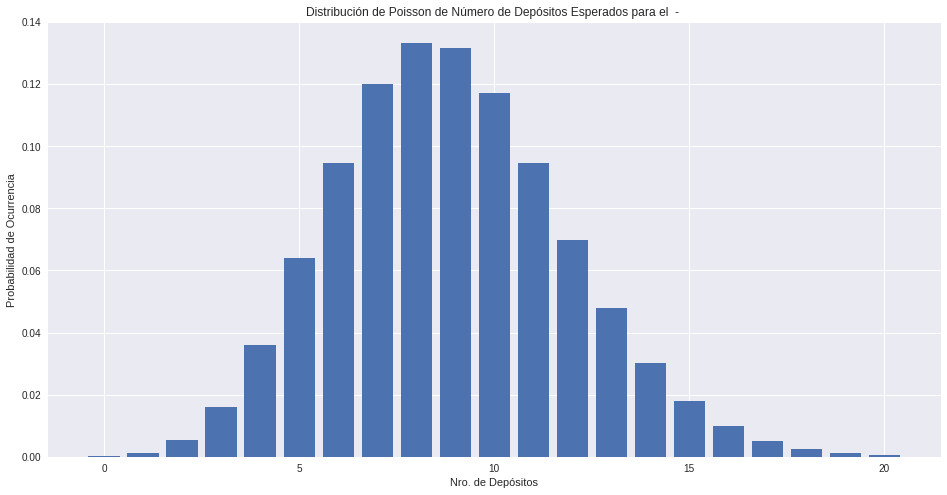

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import pandas as pd
import scipy.stats as stats

plt.style.use('seaborn')

lam      = estimatedNumDepositsArea
areaKm2  = wProyArea.value

ds      = np.sqrt(lam)


fig, ax = plt.subplots(figsize=(16,8))

#Ploteo de la Probability Mass Function

x = np.arange(0,  estimatedNumDepositsArea + ds * 4) #Eje de las x

y = poisson.pmf(x, lam)

#ax.plot(x, y , 'ro--', ms=8, label='Poisson pmf')    # PMF Points

ax.bar(x,y)

ax.set_title(f'Distribución de Poisson de Número de Depósitos Esperados para el {wProyName.value} - {wDepType.value}')
ax.set_xlabel('Nro. de Depósitos')
ax.set_ylabel('Probabilidad de Ocurrencia')


#ax.legend(loc='best', frameon=False)

plt.show()

In [4]:
sum(y)

0.9996267682803711

In [5]:
a = np.transpose(np.array([x.astype(int),y]))

df = pd.DataFrame(data=a, columns=['Nro. Depositos', 'Probabilidad'])


df2 = df.loc[(df['Probabilidad'] >= 0.01) & (df['Probabilidad'] <= 0.99)]


df2.transpose()

,3,4,5,6,7,8,9,10,11,12,13,14,15
Nro. Depositos,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,15.000000
Probabilidad,0.016183,0.035947,0.063879,0.094597,0.120073,0.133359,0.131658,0.116981,0.094491,0.069964,0.047819,0.030349,0.017977


In [6]:
maxProb = df['Probabilidad'].max()
print('Número de Depósitos con máxima probabilidad')
df.loc[ df['Probabilidad'] == maxProb]

Número de Depósitos con máxima probabilidad


,Nro. Depositos,Probabilidad
8,8.0,0.133359


## Percentiles de la Función de Probabilidad de Masa

In [7]:
# FALTA
mean, var = poisson.stats(69, moments='mv')

print(str(mean) + ' '  + str(var) )

69.0 69.0


## CDF Inversa de la Función de Probabilidad de Masa Acumulada



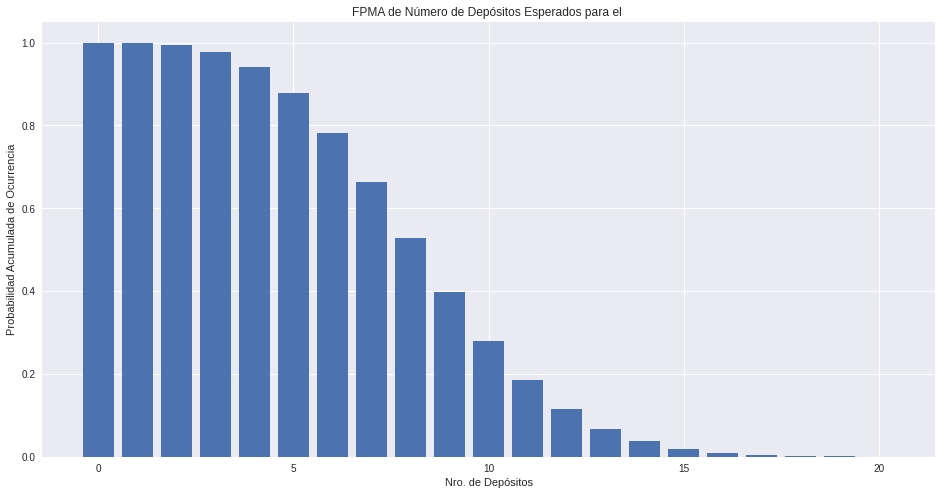

In [8]:
#Ploteo de la Probability Mass Function

fig, ax = plt.subplots(figsize=(16,8))

x = np.arange(0,  estimatedNumDepositsArea + ds * 4) #Eje de las x
y =  1 - poisson.cdf(x, lam)

ax.bar(x,y)


ax.set_title(f'FPMA de Número de Depósitos Esperados para el {wProyName.value}')
ax.set_xlabel('Nro. de Depósitos')
ax.set_ylabel('Probabilidad Acumulada de Ocurrencia')


#ax.legend(loc='best', frameon=False)

plt.show()

### Resultados de Probabilidad Según la FPMA

In [9]:
a = np.transpose(np.array([x.astype(int),y]))

df = pd.DataFrame(data=a, columns=['Nro. Depositos', 'Probabilidad'])

In [10]:
intervalLst = [x / 10 for x in  [*range(1,10)] ]

numDepLst = []

for i in intervalLst:
    pMinus = df.loc[(df['Probabilidad'] >= i)]
    pMinus = pMinus.reset_index()
    pMin = pMinus.loc[pMinus['Probabilidad'].idxmin()]
    numDepLst.append(f'{pMin.values[1]:.0f}')
    #print(i,pMin.values[1])

intervalP = [*range(10,100, 10)]

a = np.transpose(np.array([numDepLst, intervalP]))

df = pd.DataFrame(data=a, columns=['Máx. Nro. Depositos', 'Probabilidad'])



In [11]:
df.transpose()

,0,1,2,3,4,5,6,7,8
Máx. Nro. Depositos,12,10,9,8,8,7,6,5,4
Probabilidad,10,20,30,40,50,60,70,80,90


## Simulación de Monte Carlo

In [12]:
from scipy.stats import poisson

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

mu = 9

mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(poisson.ppf(0.01, mu),

              poisson.ppf(0.99, mu))

#generamos una distribución de poisson en base a lambda y una cantidad finita de observaciones
s = poisson.rvs(mu, size=100)
for i in range(10000):
    s = np.append( s, poisson.rvs(mu, size=100))


ax.hist(s, density=True)
ax.plot(x, poisson.pmf(x, mu), 'ro', ms=8, label='poisson pmf')

plt.show();

In [ ]:
# Check accuracy  of cdf and ppf:
prob = poisson.cdf(x, mu)
np.allclose(x, poisson.ppf(prob, mu))

# Bibliografía

Singer D.A., W.D. Menzie, D.M. Sutphin, D.L. Mosier, y J.D. Bliss, 2001. Mineral Deposit Density—An Update. U.S. GEOLOGICAL SURVEY PROFESSIONAL PAPER 1640–A.

Singer, D.A., 2008 Mineral Deposit Densities for Estimating Mineral Resources. Math Geosci 40, 33–46.

Cox, D.P., 1993. Estimation of undiscovered deposits in quantitative mineral resource assessment — examples from Venezuela and Puerto Rico: Nonrenewable Resources, v. 2, no. 2, p. 82–91.